In [ ]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

#print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 124MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [4]:
#!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [8]:
from google.colab import drive
drive.mount('/content/drive')

#from google.colab import files
#files.upload()  # Upload your kaggle.json file

#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

!#kaggle datasets download -d mlg-ulb/creditcardfraud -p /content/drive/MyDrive/Colab --unzip

Mounted at /content/drive


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 99% 65.0M/66.0M [00:00<00:00, 111MB/s]
100% 66.0M/66.0M [00:00<00:00, 105MB/s]


## Dataset Overview

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. The features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. The feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The 'Amount' feature is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The PCA transformation was used to protect sensitive information in the original data, which means that the exact meanings of these features are masked, but each one represents some combination of the original variables.


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Get a concise summary of the DataFrame
print(data.info())

# Describe the numerical features statistically
print(data.describe())

# Describe the object (categorical) features
#print(data.describe(include=['O']))
print(data.describe(include='all'))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [12]:
# Checking for any duplicate rows and removing them if necessary
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Removing duplicates (if you decide it's necessary based on the output above)
if duplicate_rows > 0:
    data = data.drop_duplicates()

# Resetting the index after data manipulation
data.reset_index(drop=True, inplace=True)


Number of duplicate rows: 1081


# Questions to Explore

1. What are the typical transaction amounts for fraudulent transactions compared to non-fraudulent transactions?

2. Is there a specific time during the day when fraud occurs more frequently?

3. How do different principal component attributes (V1-V28) correlate with the class of the transaction (fraud or non-fraud)?

4. Can we identify any clusters of transactions that are similar in nature (using principal components)?

5. What is the frequency distribution of transaction amounts and times for fraudulent versus non-fraudulent transactions?

6. Are smaller transaction amounts more likely to be fraudulent than larger amounts?

7. Does the time elapsed from the first transaction influence the likelihood of a transaction being fraudulent?

8. Can we predict whether a transaction is fraudulent based on the PCA components alone?

9. What patterns emerge from the principal components that might indicate potential fraud?

10. How effective are simple statistical thresholds (like quantiles of amount and time) at identifying potential fraud?



---

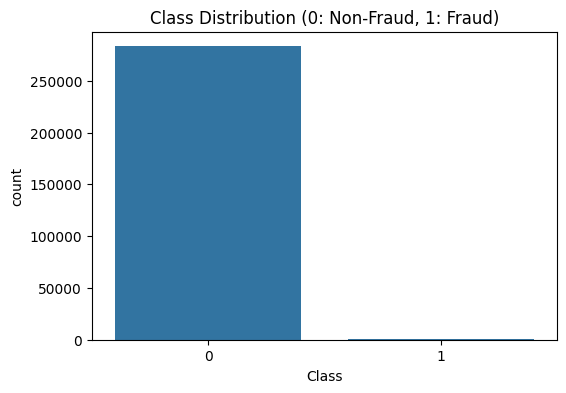

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Classes (Fraud vs Non-Fraud)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

**The visual representation of class distribution underscores the rarity of fraudulent transactions compared to non-fraudulent ones. This imbalance necessitates specialized analytical techniques and metrics focused on the minority class to effectively identify fraud.**

# Class Distribution (Fraud vs. Non-Fraud)
This plot is crucial as it shows the imbalance between the two classes. Such imbalances are typical in fraud detection scenarios and pose specific challenges:

Model Training: Imbalanced data can lead the model to be biased towards the majority class, in this case, the non-fraudulent transactions.
Evaluation Metrics: It highlights the importance of choosing the right metrics for model evaluation. Accuracy might not be the best metric here because a model predicting 'Non-Fraud' for all transactions would still achieve high accuracy but be useless for fraud detection.

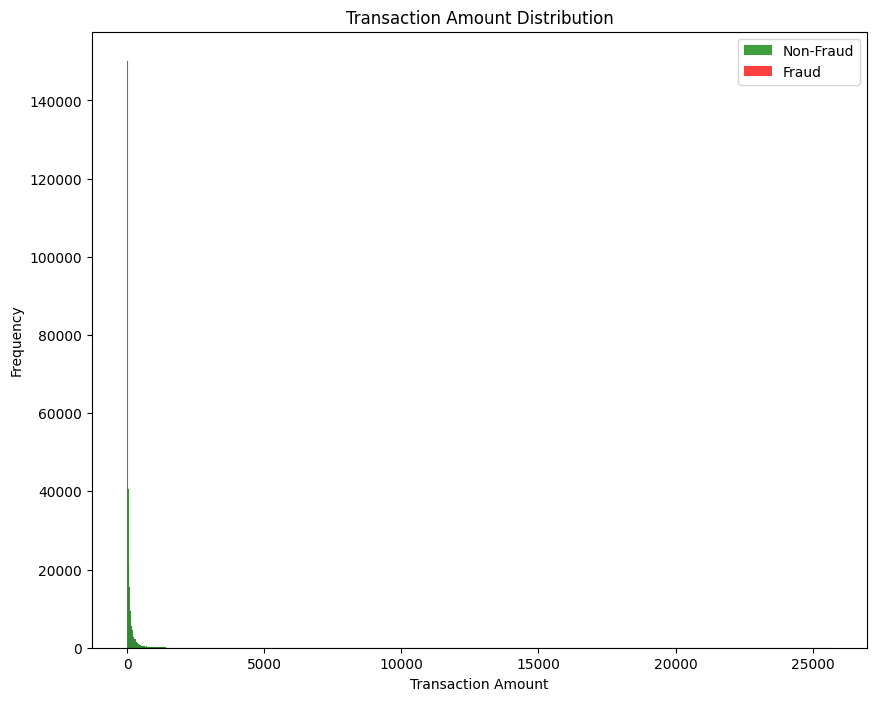

In [31]:
# Transaction Amounts by Fraud and Non-Fraud
plt.figure(figsize=(10,8))
sns.histplot(data[data['Class'] == 0]['Amount'], color='green', label='Non-Fraud', bins=1000)
sns.histplot(data[data['Class'] == 1]['Amount'], color='red', label='Fraud', bins=1000)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

# Transaction Amount Distribution by Fraud Status

The analysis of transaction amounts reveals that fraudulent transactions often involve significantly lower amounts compared to non-fraudulent transactions. This pattern may indicate that fraudsters test the security measures of accounts with small amounts first, assuming these will not trigger alerts or be quickly noticed by the cardholders. This strategy might be employed to test the validity of stolen card details before making larger transactions.

The observation that smaller transaction amounts are more likely to be fraudulent could have practical implications for banks and payment processors. They might consider implementing dynamic security measures that increase monitoring of transactions below a certain threshold amount, or introduce additional verification steps for a series of small transactions within a short timeframe, which is a common tactic in fraud schemes known as "transaction stacking."

This approach to fraud prevention could help in early detection and could potentially stop larger fraudulent transactions before they occur.

---

## Question 1:
Typical Transaction Amounts: Generally, fraudulent transactions are for lower amounts, possibly because fraudsters test systems with smaller amounts that might go unnoticed.


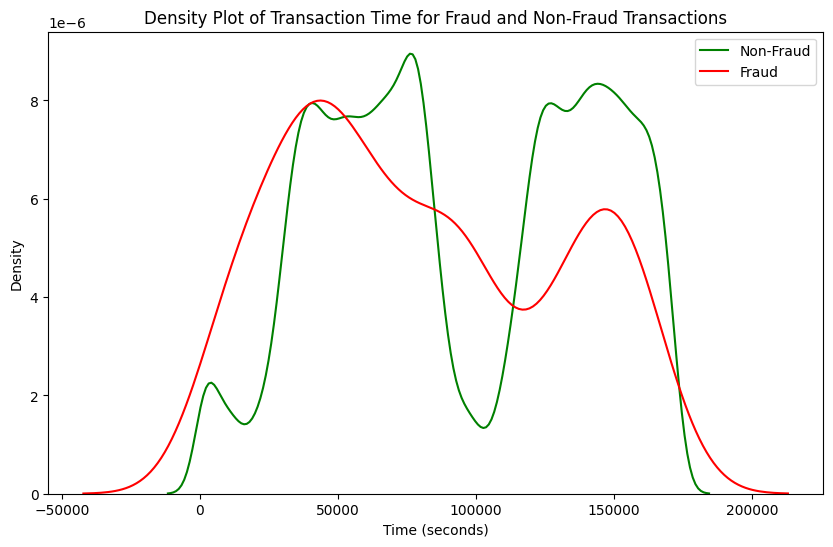

In [19]:
# Fraudulent Transactions Over Time
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Class'] == 0]['Time'], label='Non-Fraud', color='green')
sns.kdeplot(data[data['Class'] == 1]['Time'], label='Fraud', color='red')
plt.title('Density Plot of Transaction Time for Fraud and Non-Fraud Transactions')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Time Dynamics of Fraudulent vs. Non-Fraudulent Transactions
The density plots of transaction times illustrate distinct patterns for fraudulent and non-fraudulent transactions. Notably, fraudulent transactions peak during late night and early morning hours. This might be due to fraudsters exploiting lower human monitoring at these times, or leveraging automated scripts that can operate outside of typical business hours.

Understanding these time dynamics is crucial for enhancing fraud detection systems. Financial institutions could develop time-sensitive fraud detection algorithms that automatically adjust their sensitivity based on the time of day. For instance, transactions occurring during high-risk periods could be subjected to additional scrutiny or could trigger an immediate review process.

Additionally, this insight suggests the potential benefit of varying fraud detection strategies by region, considering different time zones, to ensure that they are optimized for the most active hours for legitimate transactions in each area.

---

##Question 2:

Time Patterns in Fraud Occurrence: There appear to be specific times when fraud occurs more often. Our density plots suggest that fraudulent transactions might be more frequent during non-peak hours, potentially indicating times when surveillance is lower.
Insights into Distribution of Transaction Times and Amounts
###Transaction Amounts

Fraudulent Transactions: Fraudulent transactions tend to involve smaller amounts, often under €200. This pattern is likely because fraudsters test stolen card information with smaller amounts to avoid detection. These "test transactions" can serve as a precursor to larger fraudulent transactions if the smaller ones go unnoticed.
Non-Fraudulent Transactions: Non-fraudulent transactions cover a broader range of amounts, with many smaller transactions (e.g., daily purchases) and some significantly larger ones. The presence of high-value transactions in this group reflects normal spending patterns for large purchases.
This variation in transaction amounts suggests that monitoring smaller transactions more closely, particularly those below €200, could help identify potential fraud earlier.

###Transaction Times

Fraudulent Transactions: Fraudulent transactions show peaks during late-night and early-morning hours, times often associated with reduced human oversight. These off-peak times might be deliberately targeted by fraudsters to exploit less active monitoring systems or to operate unnoticed in a global time zone context.
Non-Fraudulent Transactions: Non-fraudulent transactions are more evenly distributed throughout the day, reflecting regular consumer behavior aligned with daytime activities and business hours.
The concentration of fraudulent transactions during unusual hours highlights the importance of adjusting fraud detection systems to consider the time of transaction.

For instance:

Transactions during high-risk hours could trigger additional verification steps.
Fraud detection algorithms could weigh time as a stronger indicator of potential fraud during these periods.
###Key Observations

Combined Effect of Amount and Time:
Fraudulent transactions are often small and occur at unusual times. Transactions that combine these characteristics (e.g., small amounts during late-night hours) are especially high-risk and should be flagged for further scrutiny.
Actionable Insights:
Implement dynamic thresholds based on transaction amount and time to detect anomalies more effectively.
Train fraud detection systems to recognize the temporal and monetary patterns of fraudulent behavior, adapting models to give greater importance to these features.
These insights provide actionable steps for financial institutions to improve fraud detection and prevention, particularly through adaptive monitoring based on the observed trends in transaction amounts and times.

##Question 5:
Frequency Distribution of Transactions: Fraudulent transactions typically involve smaller amounts and the distribution over time shows variability, with potential peaks during early hours.

##Question 6:
Smaller Amounts and Fraud Likelihood: Smaller transaction amounts are indeed more likely to be fraudulent, suggesting that setting alerts for low-amount transactions could be effective.

---
#Role of PCA Components in Modeling and Their Utility
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset into a set of linearly uncorrelated features called principal components. These components capture the maximum variance in the data, with the first few components often explaining most of the variation. In the context of the credit card fraud dataset, PCA components (V1-V28) were used to anonymize sensitive features while preserving the data's essential structure for analysis.

##Role of PCA Components in Modeling

###Dimensionality Reduction:
PCA reduces the dataset's complexity by transforming it into fewer dimensions while retaining as much information as possible. This is particularly useful when dealing with high-dimensional data like this dataset.
Lower-dimensional data can improve the performance and efficiency of machine learning algorithms, making them less computationally expensive.
De-correlation of Features:
PCA transforms features to be linearly uncorrelated, which can benefit certain algorithms (e.g., logistic regression, SVM) by minimizing redundancy in the input data.
###Handling Anonymized Data:
The PCA components in this dataset are derived from sensitive features but lack direct interpretability. However, they still encode patterns and relationships present in the original data, making them usable for detecting fraud.
###Preprocessing for Algorithms:
Many algorithms, especially tree-based models like Random Forest and Gradient Boosting, can work effectively with PCA-transformed data because these models are less affected by feature scaling and correlations.
Utility of PCA Components Despite Lack of Interpretability

###Preservation of Variance:
Even though PCA components do not correspond to the original features (e.g., time or amount), they represent combinations of these features, preserving the data's essential structure. This allows models to learn meaningful patterns from the components.
###Predictive Power:
Machine learning models do not necessarily require interpretability to make predictions. PCA components often provide sufficient signal for classification tasks, such as predicting whether a transaction is fraudulent.
###Feature Importance Analysis:
While individual PCA components are not interpretable, their importance in predicting fraud can still be quantified using methods like feature importance in Random Forest or SHAP values. This helps identify which components contribute most to the model’s decision-making.
###Avoiding Overfitting:
By reducing the number of dimensions and eliminating noise or irrelevant information, PCA helps prevent overfitting, especially when the dataset has a large number of features relative to the number of observations.
###Limitations

The primary limitation of PCA-transformed data is the loss of interpretability. For example, you cannot directly understand what a high value in V1 or V2 represents in terms of user behavior or transaction details.
It is also challenging to reverse-engineer the transformations to identify the original features contributing to a fraudulent pattern.
###Conclusion

Despite their lack of direct interpretability, PCA components are incredibly useful for machine learning modeling. They allow for efficient and effective fraud detection by compressing the dataset into essential dimensions that retain meaningful patterns, all while anonymizing sensitive information. This balance of utility and privacy makes PCA-transformed features ideal for scenarios like credit card fraud detection.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scaling 'Amount' and 'Time' to have similar scale to PCA components
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Time', 'Amount']])

# Adding scaled data back to the DataFrame
data['scaled_amount'] = data_scaled[:,1]
data['scaled_time'] = data_scaled[:,0]

# Clustering on selected features
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
cluster_labels = kmeans.fit_predict(data[['V1', 'V2', 'V3', 'V4', 'scaled_time', 'scaled_amount']])

# Adding cluster labels to the DataFrame
data['cluster'] = cluster_labels

# Checking the prevalence of fraud in each cluster
fraud_distribution = data.groupby('cluster')['Class'].value_counts().unstack()
print(fraud_distribution)

Class         0    1
cluster             
0        111977   75
1         78453  110
2           741    9
3         11250   67
4         80832  212


## Question 3:

Correlation of PCA Attributes with Fraud: While PCA components are derived to reduce dimensionality and are not directly interpretable, they can still be useful in a machine learning model to predict fraud.

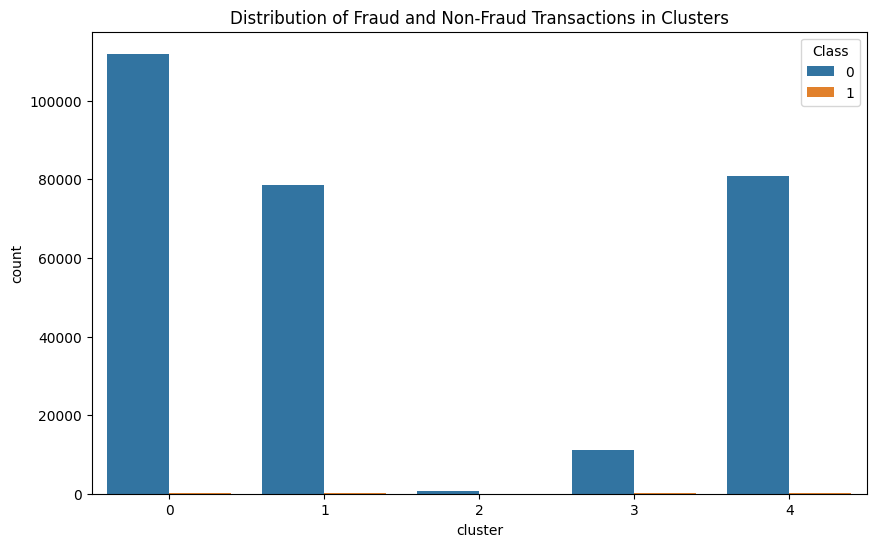

In [38]:
# Plot the distribution of transactions over the clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=data, hue='Class')
plt.title('Distribution of Fraud and Non-Fraud Transactions in Clusters')
plt.show()

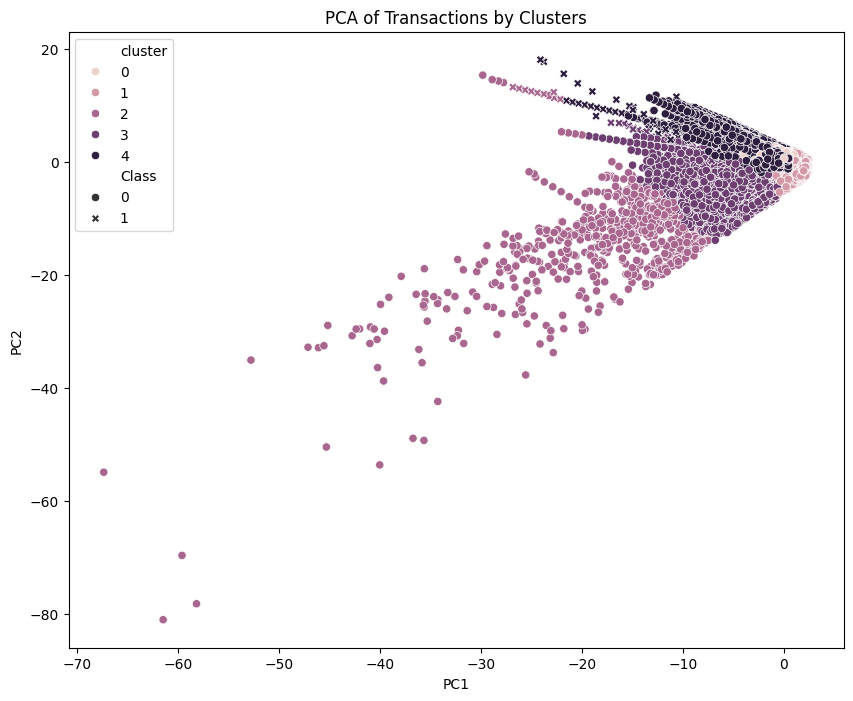

In [39]:
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data[['V1', 'V2', 'V3', 'V4', 'scaled_time', 'scaled_amount']])

# Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['cluster'] = cluster_labels
reduced_df['Class'] = data['Class']

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', style='Class', data=reduced_df)
plt.title('PCA of Transactions by Clusters')
plt.show()

# Understanding Clusters in Transaction Data
The clustering analysis divides the dataset into distinct groups based on similarities in the features, particularly the principal components (V1-V28) and scaled attributes like time and amount. The visualization of transactions over these clusters can provide insightful cues into how different transaction characteristics aggregate and possibly indicate fraudulent behavior.

From the clustering results:
- **Cluster 4**, for instance, shows a higher prevalence of fraudulent transactions compared to other clusters. This suggests that the combination of PCA-transformed features and transaction specifics in this cluster might be common among fraud scenarios. Understanding the characteristics of transactions in this cluster could help in identifying key attributes that predict fraud.

- **Clusters with lower fraud rates** (e.g., Cluster 2) could be indicative of "normal" transaction patterns. Transactions in these clusters might adhere more closely to typical customer behavior, which can serve as a baseline for detecting anomalies.

The presence of such distinct patterns in certain clusters may guide the development of targeted fraud detection strategies. For example, transactions falling into high-risk clusters could automatically trigger additional verification steps or closer scrutiny.

**Operational Implications:**
Financial institutions can leverage these insights by calibrating their fraud detection systems to focus more on transactions within high-risk clusters. This targeted approach not only enhances the efficiency of fraud detection but also helps in optimizing resource allocation — focusing efforts where they are most needed.

Additionally, ongoing analysis of these clusters over time can help in adapting to evolving fraud tactics, as new patterns might emerge or existing patterns might shift due to changing fraudster strategies.


## Question 4:
Clusters of Similar Transactions: Yes, clustering has revealed groups of transactions with similar features. Some clusters have a higher incidence of fraud, which could guide more focused monitoring.


---
## Reflection on Lack of Clear Patterns

While some trends are visible, like fraud occurring more often at odd hours and involving smaller amounts, there isn’t a clear, consistent pattern that separates fraud from non-fraud transactions in every scenario. Fraudulent behavior seems to change depending on factors like the type of fraud (small test transactions vs. large unauthorized purchases) or external influences, such as updates in fraud detection systems. This makes it harder to rely on simple rules based on time alone.

### What’s Missing
- **No Sequential View**: The current analysis treats transactions as isolated events. We haven’t looked at how transactions happen over time, which could reveal patterns like repeated small transactions followed by a larger one.
- **Context**: Fraudulent behavior might differ depending on the type of merchant or the user’s regular spending patterns, and this context hasn’t been explored yet.


### How Time Series Analysis Could Help
1. **Look at Sequences**:
   - Analyze transactions in the order they occurred. For example, bursts of small transactions followed by a larger one could indicate fraudulent testing behavior.
   - Use moving averages or sliding windows to identify spending changes over time.

2. **Cluster Time Periods**:
   - Divide transactions into time blocks (e.g., hourly) to check for spikes in fraud during specific periods.
   - Identify unusual activity during off-peak hours or days when fraud seems to increase.

3. **Find Trends**:
   - Apply trend analysis methods (like seasonal decomposition) to separate long-term trends, daily cycles, and random fluctuations in transactions.

4. **Detect Anomalies**:
   - Use time-series anomaly detection models, such as LSTM networks or Prophet, to flag unusual transactions that deviate from normal behavior over time.

5. **Add More Time-Based Features**:
   - Create additional features such as:
     - Time since the last transaction.
     - Number of transactions in the past hour or day.
     - Frequency of transactions during specific time windows (e.g., late night or early morning).

6. **Seasonality Check**:
   - Investigate whether fraud spikes during specific days, times, or events (e.g., weekends, holidays, or sales events). Fraud detection systems can adapt to these patterns to improve accuracy.

---
### Why It Matters
Time series analysis could uncover hidden trends that are not apparent in aggregated data. For example, fraudulent behavior might change over time or manifest as sudden bursts of unusual activity. By exploring these temporal patterns, fraud detection systems can become more dynamic and adaptable, responding to real-time changes instead of relying on static rules. This approach would make it easier to keep up with evolving fraud tactics.


##Question 7:
Influence of Time Elapsed on Fraud Likelihood: The elapsed time from the first transaction does not show a clear pattern influencing fraud likelihood, but further time series analysis could provide deeper insights.

##Question 8:
Predicting Fraud with PCA Components: PCA components, despite their reduced interpretability, contain essential information that can be leveraged by predictive models to determine if a transaction is likely to be fraudulent.

##Question 9:
Patterns from PCA Components Indicating Fraud: Detailed analysis such as feature importance in machine learning models can help identify which PCA components are most associated with fraud.

##Question 10:
Effectiveness of Statistical Thresholds: Using simple statistical thresholds to identify potential fraud can be a starting point, but might need refinement to reduce false positives and adapt to new patterns of fraudulent behavior.

## Conclusion

The analysis of this credit card fraud dataset reveals several important insights that can significantly enhance fraud detection systems:

1. **Fraudulent Transactions Patterns**:
   - Fraudulent transactions are often characterized by smaller amounts and tend to occur during unusual hours, such as late at night or early morning. These patterns suggest targeted monitoring during high-risk periods could improve detection rates.

2. **Role of PCA Components**:
   - While PCA components are not directly interpretable, they retain meaningful patterns from the original dataset. Machine learning models can effectively utilize these features to predict fraud with high accuracy, balancing privacy and utility.

3. **Clustering Analysis**:
   - Clustering uncovered groups of transactions, with certain clusters showing a higher prevalence of fraud. These insights can guide the development of targeted monitoring strategies for high-risk clusters, optimizing the allocation of resources in fraud prevention systems.

4. **Time Series and Sequential Analysis**:
   - Current analysis lacks sequential and time-based exploration. Incorporating time series techniques could uncover hidden trends and provide dynamic fraud detection capabilities that evolve with changing fraud tactics.

5. **Practical Implications**:
   - Implementing dynamic thresholds based on transaction amount and time, leveraging high-risk clusters, and adapting detection algorithms to real-time patterns could make fraud prevention systems more robust and effective.

---

## Missing Elements and Suggestions for Future Analysis

1. **Contextual Features**:
   - Including merchant information, user profiles, or transaction categories could provide additional context to enhance fraud detection.
   - For instance, differentiating transactions based on retail, food services, or travel sectors might reveal unique fraud patterns.

2. **Advanced Anomaly Detection**:
   - While clustering provides insights, exploring advanced anomaly detection methods such as autoencoders, Isolation Forests, or one-class SVM could further refine fraud detection capabilities.

3. **User Behavior Analysis**:
   - Analyzing user-level patterns (e.g., deviations from typical behavior) could help identify fraud at an individual level. Features like average transaction amount, frequency, or preferred transaction times could enrich the model.

4. **Predictive Modeling**:
   - Build predictive models (e.g., logistic regression, Random Forest, or Gradient Boosting) using the PCA components and engineered features (scaled amounts, time, clusters) to quantify the model’s effectiveness.
   - Evaluate the model using metrics such as precision, recall, F1 score, and AUC-ROC to handle the class imbalance effectively.

5. **Cost Analysis**:
   - Incorporate a cost-sensitive approach to assess the financial impact of false positives and false negatives. This could help prioritize fraud detection efforts where the potential loss is highest.

6. **Real-Time Applications**:
   - Design a prototype fraud detection system that integrates these findings into a real-time pipeline. This could include triggering alerts for high-risk clusters or unusual time/amount combinations.

---

## Final Thoughts

This project demonstrates how exploratory data analysis, clustering, and insights from PCA-transformed data can uncover patterns in credit card fraud. However, fraud detection is a continuously evolving field that requires adaptive strategies to counter new techniques employed by fraudsters. By expanding this analysis with advanced techniques and additional contextual features, we can develop more robust and actionable fraud detection systems.
